# Del 2: Kun kode

In [1]:
# Pakker

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import requests


In [2]:
# Oppgave 1: skrape nettside og laste inn data
# For å skrape nettsiden har jeg tatt utgangspunkt i koden av Amund Jenssen fra forelesning 9: webskraping med python

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="" style="">
<thead>
<tr>
<td>
                Modell (temp. varierte fra 0° til -10°)
                </td>
<td>
                WLTP-tall
                </td>
<td>
                STOPP
                </td>
<td>
                Avvik
                </td>
</tr>
</thead>
<tbody>
<tr><td>Tesla Model 3 LR Dual motor</td><td>614 km/14,7 kWh</td><td>521 km</td><td>-15,15 %</td></tr>
<tr><td>Mercedes-Benz EQS 580 4matic</td><td>645 km/18,3 kWh</td><td>513 km</td><td>-20,47 %</td></tr>
<tr><td>BMW iX xDrive50</td><td>591 km/21,4 kWh</td><td>503 km</td><td>-14,89 %</td></tr>
<tr><td>Tesla Model Y LR Dual motor</td><td>507 km/16,9 kWh</td><td>451 km</td><td>-11,05 %</td></tr>
<tr><td>Volkswagen ID.3 PRO S</td><td>539 km/16,3 kWh</td><td>435 km</td><td>-19,29 %</td></tr>
<tr><td>Kia EV6 2WD</td><td>528 km/16,5 kWh</td><td>429 km</td><td>-18,75 %</td></tr>
<tr><td>NIO ES8 LR 7-seter</td><td>488 km/21,5 kWh</td><td>425 km</td><td>-12,91 %</td></tr>
<tr><td>Kia EV6 4WD</td><td>484 

In [3]:

def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])



[['                Modell (temp. varierte fra 0° til -10°)                ', '                WLTP-tall                ', '                STOPP                ', '                Avvik                '], ['Tesla Model 3 LR Dual motor', '614 km/14,7 kWh', '521 km', '-15,15 %'], ['Mercedes-Benz EQS 580 4matic', '645 km/18,3 kWh', '513 km', '-20,47 %'], ['BMW iX xDrive50', '591 km/21,4 kWh', '503 km', '-14,89 %'], ['Tesla Model Y LR Dual motor', '507 km/16,9 kWh', '451 km', '-11,05 %'], ['Volkswagen ID.3 PRO S', '539 km/16,3 kWh', '435 km', '-19,29 %'], ['Kia EV6 2WD', '528 km/16,5 kWh', '429 km', '-18,75 %'], ['NIO ES8 LR 7-seter', '488 km/21,5 kWh', '425 km', '-12,91 %'], ['Kia EV6 4WD', '484 km/18,0 kWh', '423 km', '-12,60 %'], ['Volkswagen ID.4 Pro', '485 km/18,4 kWh', '414 km', '-14,64 %'], ['Hyundai Ioniq 5 2WD', '481 km/16,8 kWh', '408 km', '-15,18 %'], ['BMW i4 M50', '497 km/19,0 kWh', '406 km', '-18,31 %'], ['Skoda Enyaq iV80X', '477 km/18,2 kWh', '403 km', '-15,51 %'], ['Porsch

In [4]:
';'.join(table[0])

'                Modell (temp. varierte fra 0° til -10°)                ;                WLTP-tall                ;                STOPP                ;                Avvik                '

In [8]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('wltp-tall.csv',table)

df = pd.read_csv('wltp-tall.csv', delimiter=';')
df

,Modell (temp. varierte fra 0° til -10°),WLTP-tall,STOPP,Avvik
0,Tesla Model 3 LR Dual motor,"614 km/14,7 kWh",521 km,"-15,15 %"
1,Mercedes-Benz EQS 580 4matic,"645 km/18,3 kWh",513 km,"-20,47 %"
2,BMW iX xDrive50,"591 km/21,4 kWh",503 km,"-14,89 %"
3,Tesla Model Y LR Dual motor,"507 km/16,9 kWh",451 km,"-11,05 %"
4,Volkswagen ID.3 PRO S,"539 km/16,3 kWh",435 km,"-19,29 %"
5,Kia EV6 2WD,"528 km/16,5 kWh",429 km,"-18,75 %"
6,NIO ES8 LR 7-seter,"488 km/21,5 kWh",425 km,"-12,91 %"
7,Kia EV6 4WD,"484 km/18,0 kWh",423 km,"-12,60 %"
8,Volkswagen ID.4 Pro,"485 km/18,4 kWh",414 km,"-14,64 %"
9,Hyundai Ioniq 5 2WD,"481 km/16,8 kWh",408 km,"-15,18 %"


In [14]:
# 2: Vaske dataene

# Forenkler navn
df.columns = df.columns.str.strip()

# Splitter "WLTP-tall" i to kolonner: km og kWh (str.extract)
df[['WLTP-rekkevidde (km)', 'WLTP-energibruk (kWh/100 km)']] = df['WLTP-tall'].str.extract(r'(\d+)\s*km\s*/\s*(\d+[.,]?\d*)\s*kWh')

# Filtrerer bort radene i 'STOPP' som ikke inneholder km
df = df[df['STOPP'].str.contains('km', na=False)]

# Fjerner km fra 'STOPP'-kolonnen
# Legger til en ny kolonne 'STOPP(km)'
# KOnverterer tallene til int
df['STOPP (km)'] = df['STOPP'].str.replace(' km', '', regex=False).astype(int)

# Fjerner rader der 'Avvik' er 'x' eller mangler (NaN)
df = df[df['Avvik'].str.contains('%', na=False)]

# Fjerner % fra 'Avvik'-kolonnen
# Bytter ut komme med punktum fordi python krever punktum ved desimaltall
# Legger resultatet i en ny kolonne 'Avvik(%)'
df['Avvik (%)'] = df['Avvik'].str.replace('%', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Fjerner unødvendige kolonner
df = df.drop(columns=['WLTP-tall', 'STOPP', 'Avvik'])
df


/var/folders/pd/5bt5hmtx3x158fsmh36795dc0000gn/T/ipykernel_37040/2454662725.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STOPP (km)'] = df['STOPP'].str.replace(' km', '', regex=False).astype(int)


,Modell (temp. varierte fra 0° til -10°),WLTP-rekkevidde (km),WLTP-energibruk (kWh/100 km),STOPP (km),Avvik (%)
0,Tesla Model 3 LR Dual motor,614,"14,7",521,-15.15
1,Mercedes-Benz EQS 580 4matic,645,"18,3",513,-20.47
2,BMW iX xDrive50,591,"21,4",503,-14.89
3,Tesla Model Y LR Dual motor,507,"16,9",451,-11.05
4,Volkswagen ID.3 PRO S,539,"16,3",435,-19.29
5,Kia EV6 2WD,528,"16,5",429,-18.75
6,NIO ES8 LR 7-seter,488,"21,5",425,-12.91
7,Kia EV6 4WD,484,"18,0",423,-12.60
8,Volkswagen ID.4 Pro,485,"18,4",414,-14.64
9,Hyundai Ioniq 5 2WD,481,"16,8",408,-15.18


In [15]:
# 3: Lag en ny kolonne der forholdet mellom leverte antall kilometer og påståtte antall kilometer er angitt

# Konverter begge kolonnene til numerisk
df['STOPP (km)'] = pd.to_numeric(df['STOPP (km)'], errors='coerce')
df['WLTP-rekkevidde (km)'] = pd.to_numeric(df['WLTP-rekkevidde (km)'], errors='coerce')

# Lager en ny kolonne 'Rekkeviddeforhold' der verdiene i 'STOPP(km)' deles på 'WLTP-rekkeviddde(km)'
df['Rekkeviddeforhold'] = df['STOPP (km)'] / df['WLTP-rekkevidde (km)']
df

,Modell (temp. varierte fra 0° til -10°),WLTP-rekkevidde (km),WLTP-energibruk (kWh/100 km),STOPP (km),Avvik (%),Rekkeviddeforhold
0,Tesla Model 3 LR Dual motor,614,"14,7",521,-15.15,0.848534
1,Mercedes-Benz EQS 580 4matic,645,"18,3",513,-20.47,0.795349
2,BMW iX xDrive50,591,"21,4",503,-14.89,0.851100
3,Tesla Model Y LR Dual motor,507,"16,9",451,-11.05,0.889546
4,Volkswagen ID.3 PRO S,539,"16,3",435,-19.29,0.807050
5,Kia EV6 2WD,528,"16,5",429,-18.75,0.812500
6,NIO ES8 LR 7-seter,488,"21,5",425,-12.91,0.870902
7,Kia EV6 4WD,484,"18,0",423,-12.60,0.873967
8,Volkswagen ID.4 Pro,485,"18,4",414,-14.64,0.853608
9,Hyundai Ioniq 5 2WD,481,"16,8",408,-15.18,0.848233


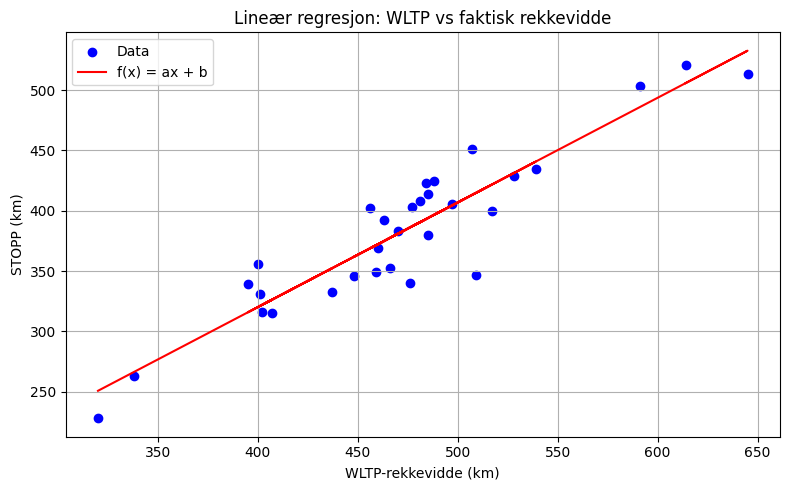

In [16]:
# 4: Lag en regresjonsmodell av typen 𝑓(𝑥) = 𝑎𝑥 + 𝑏 der WLTP-km er uavhengig variabel.

# Definerer x og y
X = df[['WLTP-rekkevidde (km)']]
y = df['STOPP (km)']

# Lager modellen 
model = LinearRegression()
model.fit(X, y)

# Henter ut koeffisientene
a = model.coef_[0]   # stigningstall
b = model.intercept_ # konstantledd

# Lager plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, model.predict(X), color='red', label='f(x) = ax + b')
plt.xlabel('WLTP-rekkevidde (km)')
plt.ylabel('STOPP (km)')
plt.title('Lineær regresjon: WLTP vs. faktisk rekkevidde')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



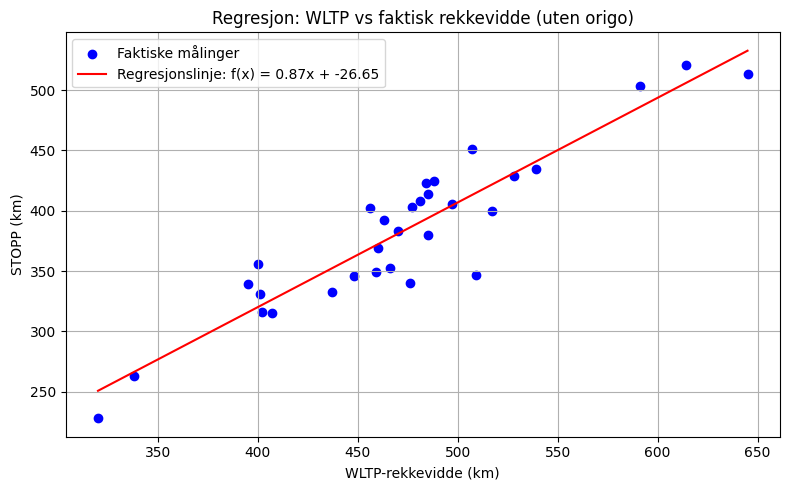

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


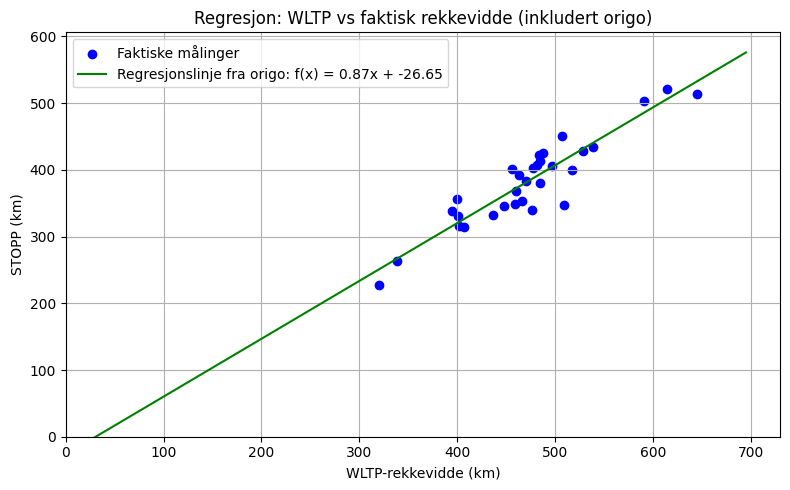

In [20]:
# 5: Plott modellen fra (4) mot datapunktene og leverandørens påståtte kjørelengde og sørg for at alle elementene i plottet er angitt tydelig for leseren. 
# Plottet skal angis i to varianter: en variant som tar utgangspunkt i de x- og y-verdier som framkommer av dataen i tabellen, en annen som inkluderer origo

# Variant 1

# Sorterer 'WLTP-rekkevidde(km)' i stigende rekkefølge
x_vals = X.sort_values(by='WLTP-rekkevidde (km)')
# Bruker den første modellen til å predikere tilhørende 'STOPP(km)'-verider
y_pred = model.predict(x_vals)

# Plotter figuren
plt.figure(figsize=(8, 5))
# Lager et punkt-diagram av de faktiske målingene fra datasettet (X og Y)
plt.scatter(X, y, label='Faktiske målinger', color='blue')
# Tegner regresjonslinje med de predikerte verdiene
# f-stringen vil vise formelen i forklaringsboksen
plt.plot(x_vals, y_pred, color='red', label=f'Regresjonslinje: f(x) = {a:.2f}x + {b:.2f}')
plt.xlabel('WLTP-rekkevidde (km)')
plt.ylabel('STOPP (km)')
plt.title('Regresjon: WLTP vs faktisk rekkevidde (uten origo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Variant 2

# Lager 100 jevnt fordelte x-verdier fra 0 til litt over maks WLTP-verdi
x_range = np.linspace(0, max(X['WLTP-rekkevidde (km)']) + 50, 100)
# Bruker regresjonsmodellen til å predikere Y-verdiene (STOPP) basert på de nye x_range-verdiene
y_line = model.predict(x_range.reshape(-1, 1))

# Plotter figuren
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Faktiske målinger', color='blue')
plt.plot(x_range, y_line, color='green', label=f'Regresjonslinje fra origo: f(x) = {a:.2f}x + {b:.2f}')
plt.xlabel('WLTP-rekkevidde (km)')
plt.ylabel('STOPP (km)')
plt.title('Regresjon: WLTP vs faktisk rekkevidde (inkludert origo)')
plt.legend()
plt.grid(True)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


In [21]:
# Finne gjennomsnittlig avvik

gjennomsnittlig_avvik = df['Avvik (%)'].mean()
print(f"Gjennomsnittlig avvik: {gjennomsnittlig_avvik:.2f} %")

Gjennomsnittlig avvik: -19.07 %


# Del 1: Rapport

Elbiler har blitt svært populære i Norge de siste årene. De virker å appellere til nordmenn for pengene spart på bensin, rabatt i bomringene og tilgang på kollektivfeltet. En ting man, spesielt som nordmann, dog burde notere seg er hvordan rekkevidden til elbilder påvirkes av lave temperaturer. Norge er jo ikke akkurat kjent for å ha milde vintere. 

I motor.no sin artikkel *Så mye rekkevidde gikk tapt i vinterkulda* (Monn-Iversen, 2022) har 31 elbilmodeller blitt testet for om de holder sin oppgitte rekkevidde. I samarbeid med NAF utførte de testen og kom fram til at alle modellene hadde et avvik på mere enn 10%. I denne rapporten har jeg sett på denne dataen og undersøkt disse avvikene nærmere.

For å finne rekkeviddeforholdet har jeg tatt antall kilometer som hver av bilmerkene stoppet på og delt på antall kilometer som bilmerkene opplyste at de hadde rekkevidde på (WLTP-km). Dette tallet viser hvor stor del av den lovte WLTP-rekkevidden modellen faktisk innfridde. Jo nærmere tallet er 1.00, jo nærmere levrte modellen. Kolonnen for avvik, derimot, viser hvor mye lavere enn forventet modellene leverte, uttrykt som prosent. Siden alle modellene leverte lavere enn WLTP-en er de alle uttrykt som en negativ prosent. Det vil si at hvis en bil har et avvik på -20% så vil den ha et rekkeviddeforhold på 0.80. 

In [19]:
df[['Modell (temp. varierte fra 0° til -10°)', 'Avvik (%)', 'Rekkeviddeforhold']]

,Modell (temp. varierte fra 0° til -10°),Avvik (%),Rekkeviddeforhold
0,Tesla Model 3 LR Dual motor,-15.15,0.848534
1,Mercedes-Benz EQS 580 4matic,-20.47,0.795349
2,BMW iX xDrive50,-14.89,0.851100
3,Tesla Model Y LR Dual motor,-11.05,0.889546
4,Volkswagen ID.3 PRO S,-19.29,0.807050
5,Kia EV6 2WD,-18.75,0.812500
6,NIO ES8 LR 7-seter,-12.91,0.870902
7,Kia EV6 4WD,-12.60,0.873967
8,Volkswagen ID.4 Pro,-14.64,0.853608
9,Hyundai Ioniq 5 2WD,-15.18,0.848233


For å visualisere forskjellen mellom forventet rekkevidde og faktisk rekkevidde har jeg tegnet to regresjonsmodeller. Poenget med en regresjonsmodell er at den viser sammenhengen mellom et antall observasjoner ved å tegne en rett linje gjennom dem. Regresjonsmodellen har altså her tatt alle de faktiske observasjonene (de blå prikkene i diagrammet), og tegnet en linje gjennom. Vi har under to versjoner av samme regresjonsmodell. Den første varianten tegner regresjonslinjen kun ut ifra dataen jeg har gitt den. Den andre varianten går også ut ifra dataene, men den tvinges til å gå gjennom origo. Hvilken modell en vil bruke til analyse kommer an på hva man ønsker å undersøke. Med variant én får vi tall ut ifra kun ren data, men med variant to får vi se modellens utvikling helt fra 0 og får et mer helhetlig bilde. En forskjell vi kan se her på de to figurene er at de maler et litt forskjellig bilde på hvor langt bilene kom. Hvis vi ser på den første varianten kan det se ut som at det er veldig stor forskjell mellom bilmodellene siden de er så spredt ut, men når vi ser på variant to kan vi observere at når du starter skalaen fra 0 så plasserer observasjonene seg ganske nærme hverandre. Dette viser hvor mye det har å si hvilke tall man plasserer på aksene. 

Vi har nå tatt en nærmere titt på påstått rekkevidde versus faktisk rekkevidde på elbiler i 2022, og har funnet tydelige avvik. Spørsmålet vi kan stille oss blir da: kan vi egentlig med tilstrekkelig grad av sannsynlighet påstå at leverandørene holder det de lover? Når vi regner ut gjennomsnittlig avvik fra påstått rekkevidde får vi et avvik på -19.07%. Vi ser også at rekkeviddeforholdet ofte legger seg på mellom 0.7 til 0.9. Vi ser dermed at ikke bare noen, men alle bilene leverer under det de lover. Med det kan vi konkludere med at leverandørene ikke holder det de lover.


# Kilder
Monn-Iversen, Ø., A. (2022, 4. februar). Så mye rekkevidde gikk tapt i vinterkulda. Motor.no. https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132